In [3]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pickle
from collections import Counter

In [4]:
log = './results/run_CV_tournament_09/pickles/pickle_all-49'
#log_dir = '/Users/ferryhooft/Master/keras/coord_test/results/run2/'

In [5]:
with open(log, 'rb') as fp:
    full_data_pickle = pickle.load(fp)

In [6]:
def sort_key(arg):
    return arg[1]

In [7]:
top = 50
sorted_data = [sorted([x for x in full_data_pickle[gen]], key=sort_key)[:top] for gen in full_data_pickle]
data = sorted_data

In [8]:
scores = [sorted([x[1] for x in gen]) for gen in data]

In [9]:
len(sorted_data[0])

50

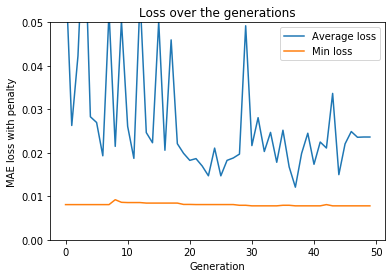

0.0078081354498863225
30 0


({'network_config': {'n_layers': 4,
   'batch_size': 8000,
   'optimizer': 'adam',
   'epochs': 500},
  'layer_config': {'layer_type': ['batch_norm', 'dropout', 'dense', 'dense'],
   'n_nodes': [64, 16, 8, 64],
   'activation': ['selu', 'linear', 'relu', 'relu'],
   'dropout': [0.2, 0.2, 0.2, 0.2]},
  'io_config': {'input_shape': 4,
   'inputs': ['phi', 'OO_distance', 'omega', 'psi'],
   'outputs': ['custom'],
   'output_shape': 24}},
 0.0078081354498863225,
 48)

In [10]:
avg_points = [np.mean(x) for x in scores]
min_points = [np.min(x) for x in scores]
plt.plot(avg_points, label='Average loss')
plt.plot(min_points, label='Min loss')
plt.title('Loss over the generations')
plt.ylabel("MAE loss with penalty")
plt.xlabel("Generation")
plt.legend()
plt.ylim(0, 0.05)
#plt.savefig('figures/AD_CV_CT_loss.eps', format='eps')
plt.show()

print(np.min(min_points))

#get best network
min_gen = scores[min_points.index(np.min(min_points))]
min_point = min_gen.index(np.min(min_gen))
best_network = data[min_points.index(np.min(min_points))][min_point]
print(min_points.index(np.min(min_points)), min_point)
best_network

In [11]:
for gen in data:
    print(gen[0][0]['io_config']['inputs'])

['psi', 'OO_distance', 'phi']
['psi', 'OO_distance', 'phi']
['psi', 'OO_distance', 'phi']
['psi', 'OO_distance', 'phi']
['psi', 'OO_distance', 'phi']
['psi', 'OO_distance', 'phi']
['psi', 'OO_distance', 'phi']
['psi', 'OO_distance', 'phi']
['NCaR_angle', 'phi', 'OO_distance', 'end_Ca_end_angle', 'psi', 'omega']
['omega', 'psi', 'end_Ca_end_angle', 'phi', 'OO_distance', 'the']
['psi', 'end_Ca_end_angle', 'phi', 'NCaR_angle', 'omega', 'OO_distance']
['psi', 'end_Ca_end_angle', 'phi', 'NCaR_angle', 'omega', 'OO_distance']
['psi', 'end_Ca_end_angle', 'phi', 'NCaR_angle', 'omega', 'OO_distance']
['omega', 'psi', 'OO_distance', 'phi', 'the']
['omega', 'psi', 'OO_distance', 'phi', 'the']
['omega', 'psi', 'OO_distance', 'phi', 'the']
['omega', 'psi', 'OO_distance', 'phi', 'the']
['omega', 'psi', 'OO_distance', 'phi', 'the']
['omega', 'psi', 'OO_distance', 'phi', 'the']
['phi', 'psi', 'OO_distance', 'omega', 'the']
['phi', 'psi', 'OO_distance', 'omega', 'the']
['omega', 'the', 'psi', 'OO_distan

In [11]:
#get data for dropout
dropout_use = [[network[0]['layer_config']['dropout'] for network in gen] for gen in data]
avg_drop = [np.mean([np.mean(x) for x in gen]) for gen in dropout_use]

#get data for activation layers
activations = [[network[0]['layer_config']['activation'] for network in gen] for gen in data]
activation_counts = [[Counter(x) for x in gen] for gen in activations]
activation_counts = [np.sum(gen) for gen in activation_counts]
n_layers = [[x[0]['network_config']['n_layers'] for x in gen] for gen in data]
n_layers_gen = [float(np.sum(gen)) for gen in n_layers]
#n_per_gen = len(data[0])
#n_gen = len(data)
elu_use =  [gen['selu']/n_layers_gen[i] for i, gen in enumerate(activation_counts)]
relu_use =  [gen['relu']/n_layers_gen[i] for i, gen in enumerate(activation_counts)]
sigmoid_use =  [gen['sigmoid']/n_layers_gen[i] for i, gen in enumerate(activation_counts)]
tanh_use =  [gen['tanh']/n_layers_gen[i] for i, gen in enumerate(activation_counts)]

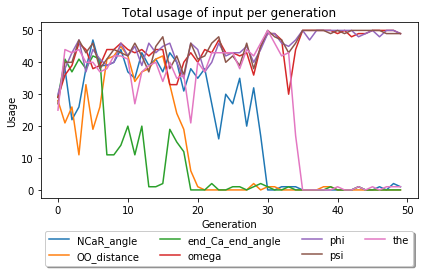

In [13]:
inputs = [[network[0]['io_config']['inputs'] for network in gen] for gen in data]
inputs_counts = [[Counter(x) for x in gen] for gen in inputs]
inputs_counts = [np.sum(gen) for gen in inputs_counts]

input_data = {}
all_inputs = []
for inputs in inputs_counts:
    for key in inputs.keys():
        all_inputs.append(key)
all_inputs = list(set(all_inputs))


for i, gen in enumerate(inputs_counts):
    for key in all_inputs:
        if i == 0:
            input_data[key] = []
        try:
            n_inputs = gen[key]
        except:
            n_inputs = 0
        input_data[key].append(gen[key])

fig, ax2 = plt.subplots()
ax2.set_ylabel('Usage') 
ax2.set_xlabel('Generation')
ax2.tick_params(axis='y')

for key in sorted(input_data.keys()):
    ax2.plot(input_data[key], label=key)

plt.title('Total usage of input per generation')
plt.tight_layout()
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.16), fancybox=True, shadow=True, ncol=4)
plt.tight_layout()
#plt.savefig('figures/AD_CV_CT_cvs.pdf', format='pdf')
plt.show()

In [11]:
inputs = [[[network[0]['io_config']['inputs'], network[1]] for network in gen] for gen in data]
for e, gen in enumerate(inputs):
    for i in gen:
        if 'phi' in i[0] and 'psi' in i[0]:
            print(e, i)

0 [['OO_distance', 'end_Ca_end_angle', 'omega', 'psi', 'phi', 'the'], 0.008157219119881536]
0 [['NCaR_angle', 'OO_distance', 'psi', 'end_Ca_end_angle', 'omega', 'phi'], 0.009323940436492937]
0 [['omega', 'NCaR_angle', 'phi', 'end_Ca_end_angle', 'OO_distance', 'psi'], 0.009323940436492937]
0 [['NCaR_angle', 'omega', 'phi', 'psi', 'OO_distance', 'end_Ca_end_angle'], 0.009323940436492937]
0 [['psi', 'phi', 'the'], 0.009650335456828963]
0 [['the', 'OO_distance', 'NCaR_angle', 'psi', 'phi'], 0.009847889425998037]
0 [['omega', 'phi', 'end_Ca_end_angle', 'the', 'psi', 'OO_distance', 'NCaR_angle'], 0.010255713883079139]
0 [['end_Ca_end_angle', 'OO_distance', 'NCaR_angle', 'phi', 'omega', 'the', 'psi'], 0.010255713883079139]
0 [['psi', 'end_Ca_end_angle', 'omega', 'OO_distance', 'phi', 'NCaR_angle'], 0.011238766714593909]
0 [['phi', 'omega', 'the', 'end_Ca_end_angle', 'psi', 'OO_distance', 'NCaR_angle'], 0.011720341309700908]
0 [['psi', 'phi', 'omega', 'NCaR_angle'], 0.011917417205240267]
0 [['

44 [['psi', 'phi', 'OO_distance'], 0.007956724759864524]
44 [['OO_distance', 'psi', 'phi'], 0.00880328966401816]
44 [['OO_distance', 'psi', 'phi'], 0.008840590159295192]
44 [['OO_distance', 'phi', 'psi'], 0.008880375452375756]
44 [['OO_distance', 'psi', 'phi'], 0.00923529803547378]
44 [['OO_distance', 'phi', 'psi', 'the'], 0.009471905267637276]
44 [['psi', 'OO_distance', 'phi'], 0.009541138588886146]
44 [['phi', 'OO_distance', 'psi'], 0.009565983976789086]
44 [['phi', 'OO_distance', 'psi'], 0.009721151034445007]
44 [['psi', 'phi', 'OO_distance'], 0.010222962314423855]
44 [['phi', 'psi', 'OO_distance'], 0.012202011914750606]
44 [['OO_distance', 'phi', 'psi'], 0.012350126112926752]
45 [['psi', 'phi', 'OO_distance'], 0.0064342176955668445]
45 [['phi', 'OO_distance', 'psi'], 0.0064342176955668445]
45 [['psi', 'phi', 'OO_distance'], 0.0064342176955668445]
45 [['OO_distance', 'phi', 'psi'], 0.0064342176955668445]
45 [['psi', 'OO_distance', 'phi'], 0.0064342176955668445]
45 [['psi', 'phi', 'O

In [81]:
def plot_stat_per_layer(data, stat, n_layers_max):
    final = {}
    for layer in range(n_layers_max):
        final[layer] = {}
        for gen_id, gen in enumerate(data):
            final[layer][gen_id] = []
            for network in gen:
                try:
                    final[layer][gen_id].append((network[0]['layer_config'][stat])[layer])
                except IndexError:
                    pass
    #make counter of every gen per layer
    total = []
    for layer in range(n_layers_max):
        for gen_id, gen in enumerate(data):
            i_counter = Counter(final[layer][gen_id])
            final[layer][gen_id] = i_counter
            total.append(i_counter)
    
    layer_types = final

    #get all layer types:
    all_keys = np.sum(total).keys()

    #split into the different layers
    type_per_layer = {}
    for layer in range(n_layers_max):
        type_per_layer[layer] = {}
        for layer_type in all_keys:
            type_per_layer[layer][layer_type] = []
            for gen in layer_types[layer].keys():
                try:
                    type_per_layer[layer][layer_type].append(layer_types[layer][gen][layer_type])
                except:
                    type_per_layer[layer][layer_type].append(0)
    type_per_layer
    
    all_keys.sort()
    
    for layer in type_per_layer.keys():
        for key in all_keys:
            plt.plot(type_per_layer[layer][key], label=key)
        plt.title('Layer number: '+ str(layer))
        plt.legend()
        plt.show()

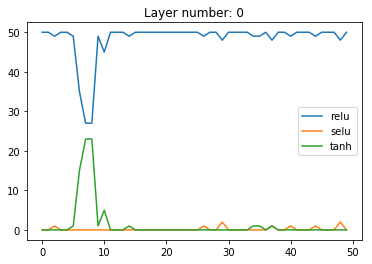

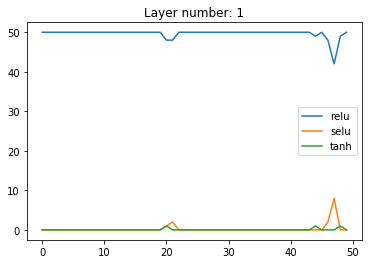

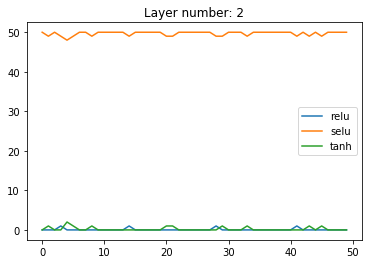

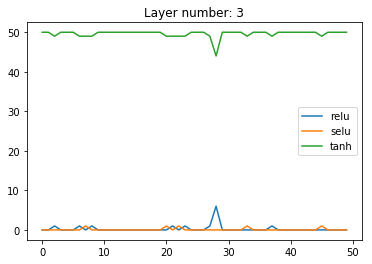

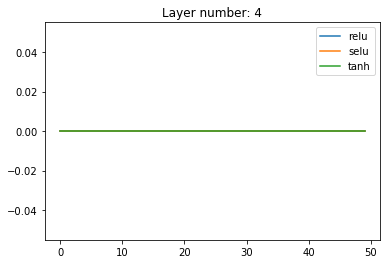

In [82]:
plot_stat_per_layer(data, 'activation', 5)

Insertion of layer 4 seems to be exactly the same every time, but this is because the layer insertion can happen anywhere and not just at the end. Not actually sure if the final layer can be inserted at the end. (it could not, now it can though)
Therefore the final layer (layer number 4) will be what layer 3 was before. Mutation of this layer can only happen if it persists for one round and than gets selected for mutation.

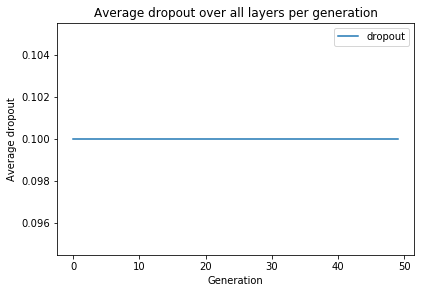

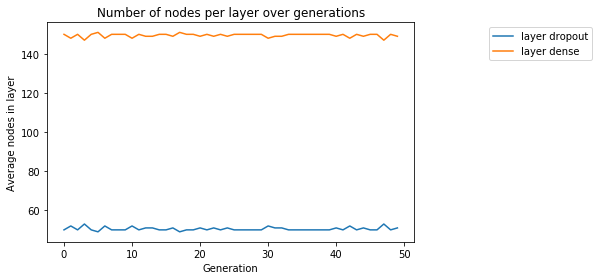

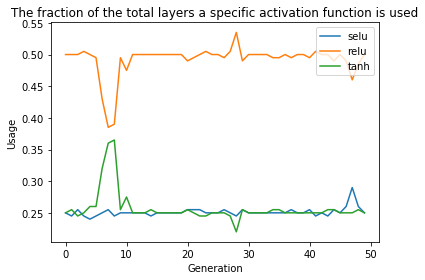

In [83]:
#create dropout plot
fig, ax1 = plt.subplots()
ax1.set_xlabel('Generation')
ax1.set_ylabel('Average dropout')
ax1.plot(avg_drop, label='dropout')
ax1.tick_params(axis='y')
plt.legend(loc=1)
plt.tight_layout()
plt.title('Average dropout over all layers per generation')
plt.show()

#create layer type plot
layer_types = [[x[0]['layer_config']['layer_type'] for x in gen] for gen in data]
layer_types = [[Counter(x) for x in gen] for gen in layer_types]
layer_types = [np.sum(gen) for gen in layer_types]

layer_types_by_type = {}
for layer_type in layer_types[0].keys():
    layer_types_by_type[layer_type] = {}
    for i, gen in enumerate(layer_types):
        if i==0:
            layer_types_by_type[layer_type] = [gen[layer_type]]
        else:
            layer_types_by_type[layer_type].append(gen[layer_type])
            
for i in layer_types_by_type.keys():
    plt.plot(layer_types_by_type[i], label='layer {}'.format(i))

plt.title("Number of nodes per layer over generations")
plt.xlabel('Generation')
plt.ylabel('Average nodes in layer')
plt.tight_layout()
plt.legend(loc='upper right', bbox_to_anchor=(1.5, 1))
plt.show()


#create layer activation plot
fig, ax2 = plt.subplots()
ax2.set_ylabel('Usage') 
ax2.set_xlabel('Generation')
ax2.tick_params(axis='y')
ax2.plot(elu_use, label='selu')
ax2.plot(relu_use, label='relu')
ax2.plot(tanh_use, label='tanh')
plt.title('The fraction of the total layers a specific activation function is used')
plt.tight_layout()
plt.legend(loc=1)
fig.tight_layout()
plt.show()

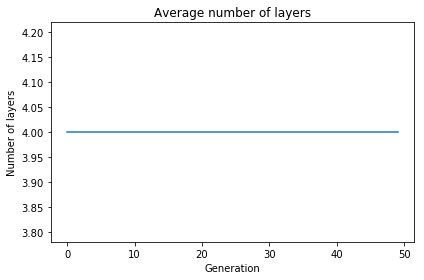

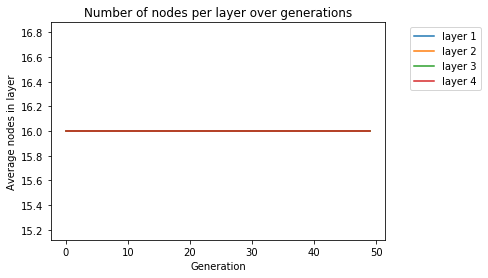

In [84]:
#create plot for average # layers
avg_layers = [np.mean(x) for x in n_layers]
plt.plot(avg_layers)
plt.title('Average number of layers')
plt.xlabel('Generation')
plt.ylabel('Number of layers')
plt.tight_layout()
plt.show()


n_nodes = [[x[0]['layer_config']['n_nodes'] for x in gen] for gen in data]
avg_layers = [np.mean(x) for x in n_layers]

n_nodes_per_layer = {}
for k, gen in enumerate(n_nodes):
    n_nodes_per_layer[k] = {}
    for network in gen:
        for i, layer in enumerate(network):
            try:
                n_nodes_per_layer[k][i].append(layer)
            except:
                n_nodes_per_layer[k][i] = [layer]
    
    for j in n_nodes_per_layer[k].keys():
        n_nodes_per_layer[k][j] = np.mean(n_nodes_per_layer[k][j])
        
ordered = {}
for layer in n_nodes_per_layer[0].keys():
    ordered[layer] = {}
    for i, gen in enumerate(n_nodes_per_layer.keys()):
        if i==0:
            ordered[layer] = [n_nodes_per_layer[gen][layer]]
        else:
            try:
                ordered[layer].append(n_nodes_per_layer[gen][layer])
            except KeyError:
                ordered[layer].append(0)
                
for i in ordered.keys():
    plt.plot(ordered[i], label='layer {}'.format(i+1))

plt.title("Number of nodes per layer over generations")
plt.xlabel('Generation')
plt.ylabel('Average nodes in layer')
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
plt.show()

#does not show input layer of size 2

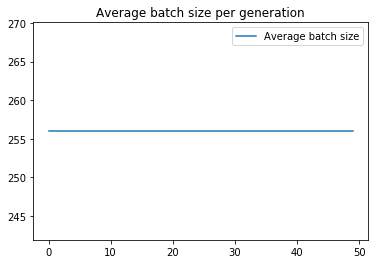

In [85]:
batch_size = [[network[0]['network_config']['batch_size'] for network in gen] for gen in data]
average_batch_size = [np.mean(x) for x in batch_size]
min_batch_size = [np.min(x) for x in batch_size]
max_batch_size = [np.max(x) for x in batch_size]
plt.plot(average_batch_size, label='Average batch size')
#plt.plot(min_batch_size, label='Minimum batch size')
#plt.plot(max_batch_size, label='Maximum batch size')
plt.title('Average batch size per generation')
plt.legend()
plt.show()
    

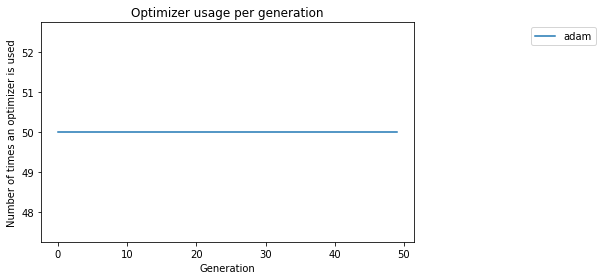

In [86]:
optimizer_types = [[x[0]['network_config']['optimizer'] for x in gen] for gen in data]
optimizer_types = [Counter(gen) for gen in optimizer_types]
optimizer_types = [np.sum(gen) for gen in optimizer_types]

optimizer_types_by_type = {}
for layer_type in optimizer_types[0].keys():
    optimizer_types_by_type[layer_type] = {}
    for i, gen in enumerate(optimizer_types):
        if i==0:
            optimizer_types_by_type[layer_type] = [gen[layer_type]]
        else:
            optimizer_types_by_type[layer_type].append(gen[layer_type])
            
for i in optimizer_types_by_type.keys():
    plt.plot(optimizer_types_by_type[i], label='{}'.format(i))

plt.title("Optimizer usage per generation")
plt.xlabel('Generation')
plt.ylabel('Number of times an optimizer is used')
plt.tight_layout()
plt.legend(loc='upper right', bbox_to_anchor=(1.5, 1))
plt.show()

In [4]:
network = {'io_config': {'input_shape': 2,
               'inputs': ['psi', 'phi'],
               'output_shape': 24,
               'outputs': ['custom']},
 
  'layer_config': {'activation': ['relu', 'relu', 'selu', 'tanh'],
                   'dropout': [0.1, 0.1, 0.1, 0.1],
                   'layer_type': ['dense', 'dense', 'dense', 'dropout'],
                   'n_nodes': [16, 16, 16, 16]},
 
  'network_config': {'batch_size': 256,
                     'epochs': 100,
                     'n_layers': 4,
                     'optimizer': 'adam'}
}

In [10]:
network = {'io_config': {'input_shape': 1,
   'inputs': ['phi'],
   'output_shape': 18,
   'outputs': ['custom']},
  'layer_config': {'activation': ['relu', 'relu'],
   'dropout': [0.2, 0.1],
   'layer_type': ['batch_norm', 'batch_norm_dropout'],
   'n_nodes': [16, 16]},
  'network_config': {'batch_size': 256,
   'epochs': 250,
   'n_layers': 2,
   'optimizer': 'adam'}}

In [16]:
def build_model(network):
    
    from keras import Sequential
    from keras.layers import Dense, Activation, Dropout, BatchNormalization, Lambda, ActivityRegularization, add, Input
    from keras import regularizers
    from keras.optimizers import Adam
    import keras.backend as K
    from keras.backend import clear_session
    
    clear_session()   
    
    def MaxAE(y_true, y_pred):
        minus_y_pred = Lambda(lambda x: -x)(y_pred)
        return K.max(K.abs(add([y_true, minus_y_pred])))
    
    n_layers = network['network_config']['n_layers']
    n_nodes = network['layer_config']['n_nodes']

    model = Sequential()
    layer_types = network['layer_config']['layer_type']
    
    model.add(Input([network['io_config']['input_shape']]))
    
    for layer in range(network['network_config']['n_layers']):
        #configure first layer with input_shape
        if layer == 0:
            model.add(Dense(network['layer_config']['n_nodes'][layer]))
        else:
            model.add(Dense(network['layer_config']['n_nodes'][layer]))

        if (layer_types[layer] == 'batch_norm' or layer_types[layer] == 'batch_norm_dropout'):
            model.add(BatchNormalization())

        model.add(Activation(network['layer_config']['activation'][layer]))

        if (layer_types[layer] == 'dropout' or layer_types[layer] == 'batch_norm_dropout'):
            model.add(Dropout(network['layer_config']['dropout'][layer]))
    
    model.add(Dense(network['io_config']['output_shape']))    
    
    model.compile(optimizer=Adam(amsgrad=True),
                  metrics=['mse', 'mae', MaxAE],
                  loss='mae')  
    return model

In [17]:
model = build_model(network)

TypeError: The added layer must be an instance of class Layer. Found: Tensor("input_1:0", shape=(?, 1), dtype=float32)

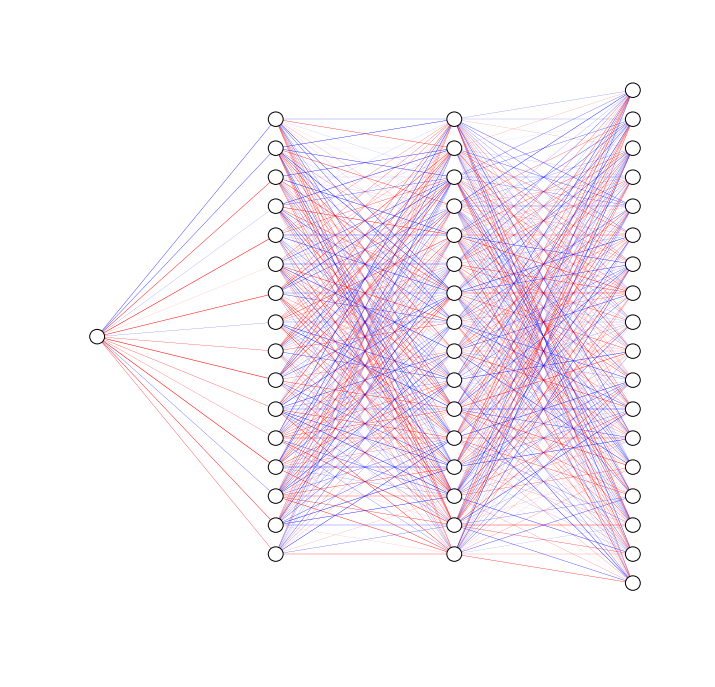

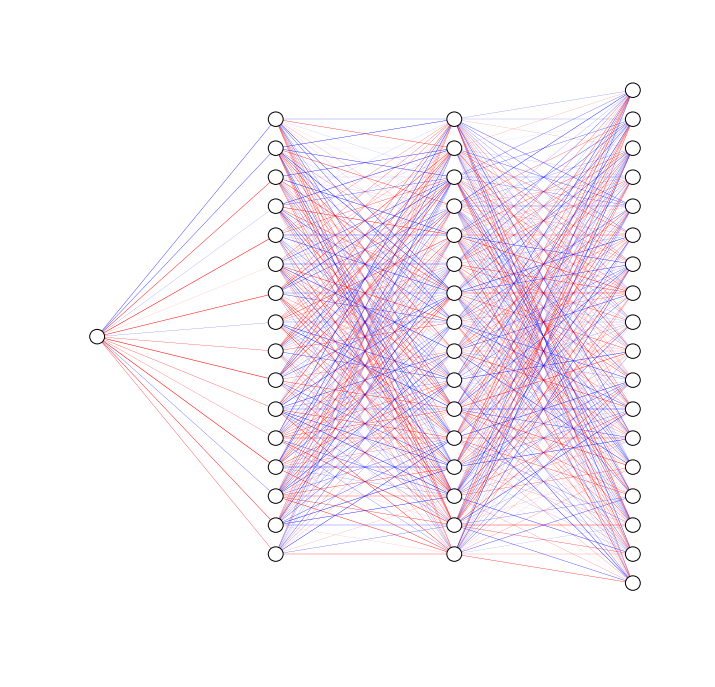

In [13]:
from optimizer.keras_utilities import draw_neural_net
draw_neural_net(model)

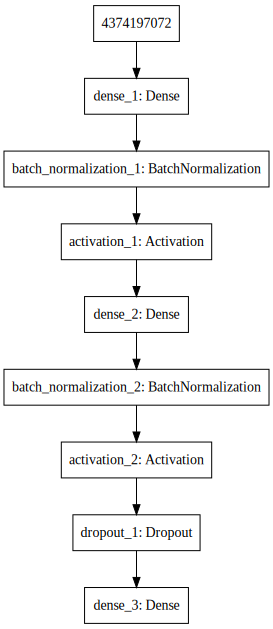

In [14]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model).create(prog='dot', format='svg'))